# Color Compression using K-means Clustering
In this exercise, you will apply k-means clustering to compress colors in an RGB image. Instead of using all possible values in the RGB space, each pixel will be assigned to one of `k` prototypical color vectors, the so-called codebook vectors each of which corresponding to a cluster centroid. By doing so, the image can be described only by the codebook vectors and not the full RGB values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sklearn.cluster
import sklearn.metrics
import sklearn.utils

## Data Loading
Convert the image pixels into a data matrix `image_array` that you can use for k-means clustering. Think about what shape the data matrix should have.

In [2]:
# Load image and convert to float between 0 and 1
im = Image.open('baboon.png')
image = np.array(im, dtype=np.float64) / 255

### BEGIN SOLUTION
image_array = np.reshape(image, (-1, image.shape[2]))
### END SOLUTION
print(image_array.shape)

(262144, 3)


## K-means clustering
Use `sklearn.cluster.KMeans` for clustering and train it on `num_train` randomly selected data points. You can use `sklearn.utils.shuffle` for this purpose.

In [3]:
num_train = 1000
n_colors = 4  # number of codebook vectors

### BEGIN SOLUTION
image_array_train = sklearn.utils.shuffle(image_array, random_state=0)[:num_train]
kmeans = sklearn.cluster.KMeans(n_clusters=n_colors, random_state=0).fit(image_array_train)
### END SOLUTION

Assign all samples to a codebook vector and store the result in the array `cluster_assignment`.

In [4]:
### BEGIN SOLUTION
cluster_assignment = kmeans.predict(image_array)
### END SOLUTION

## Reconstruction
Write a function that reconstructs the compressed image from the codebook and the cluster assignments. Reshape the image to its original shape.

In [5]:
def reconstruct(centroids, cluster_assignment, w, h):
    """
    :param centroids: The codebook of k-means.
    :param w: The width of the image to reconstruct.
    :param h: The height of the image to reconstruct.
    """
    ### BEGIN SOLUTION
    d = centroids.shape[1]
    reconstructed_image = np.zeros((w, h, d))
    label_idx = 0
    image_array_reconstructed = np.array([centroids[c] for c in cluster_assignment])
    image_reconstructed = image_array_reconstructed.reshape((w, h, 3))
    ### END SOLUTION
    return image_reconstructed

## Visualization
Reconstruct the image and plot it together with its original version.

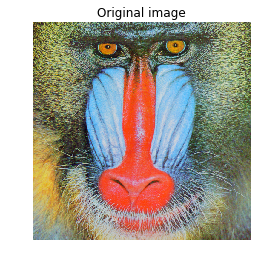

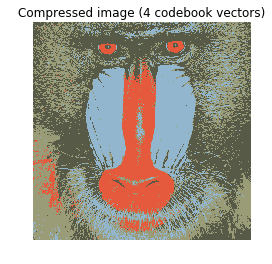

In [6]:
### BEGIN SOLUTION
plt.figure()
plt.axis('off')
plt.title('Original image')
plt.imshow(image)

plt.figure()
plt.axis('off')
plt.title(f'Compressed image ({n_colors} codebook vectors)')
plt.imshow(reconstruct(kmeans.cluster_centers_, cluster_assignment, image.shape[0], image.shape[1]))
### END SOLUTION
plt.show()

Create a random subset of the data, e.g. 500 samples.

In [7]:
### BEGIN SOLUTION
subset = sklearn.utils.shuffle(image_array)[:500]
### END SOLUTION

Plot this subset along with the codebook vectors in a 3D scatter plot. Each sample should be colored according to its RGB value.

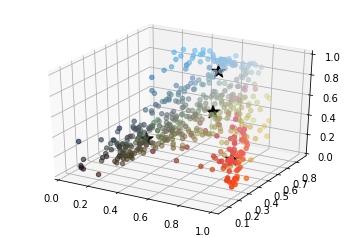

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # -> ax.scatter == plt.scatter

### BEGIN SOLUTION
ax.scatter(*subset.T, c=subset)
ax.scatter(*kmeans.cluster_centers_.T, c="k", marker="*", s=200, alpha=1)
### END SOLUTION

plt.show()